In [721]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [722]:
#データ読み込み
train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/test.csv")

In [723]:
y = train['Survived']

In [724]:
X_merge = pd.concat([train.drop(["Survived"],axis = 1),test])

In [725]:
X_merge = X_merge.drop(["Name","Ticket","PassengerId"],axis = 1)

In [726]:
X_merge = pd.get_dummies(X_merge, drop_first=True)

In [727]:
X_merge

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,26.0,0,0,7.9250,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1,35.0,1,0,53.1000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,35.0,0,0,8.0500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
414,1,39.0,0,0,108.9000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
415,3,38.5,0,0,7.2500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
416,3,NaN,0,0,8.0500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [728]:
X = X_merge[:891]

In [729]:
x_output = X_merge[891:]

In [730]:
x_output

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A11,Cabin_A14,Cabin_A16,Cabin_A18,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,3,47.0,1,0,7.0000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2,62.0,0,0,9.6875,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,3,27.0,0,0,8.6625,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,22.0,1,1,12.2875,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
414,1,39.0,0,0,108.9000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
415,3,38.5,0,0,7.2500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
416,3,NaN,0,0,8.0500,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [731]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [732]:
import lightgbm as lgb
model = lgb.LGBMClassifier(boosting_type='goss', learning_rate=0.05,max_depth=5, random_state=500)

In [733]:
eval_set = [(X_test, y_test)]
callbacks = []
callbacks.append(lgb.early_stopping(stopping_rounds=10))
callbacks.append(lgb.log_evaluation())
model.fit(X_train, y_train, eval_set=eval_set, callbacks=callbacks)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 228, number of negative: 395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 189
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 8
[LightGBM] [Info] Using GOSS
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosti

LGBMClassifier(boosting_type='goss', learning_rate=0.05, max_depth=5,
               random_state=500)

In [734]:
from sklearn import metrics
y_pred = model.predict_proba(X_test)
metrics.log_loss(y_test, y_pred)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


0.37280506800810487

<Axes: title={'center': 'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

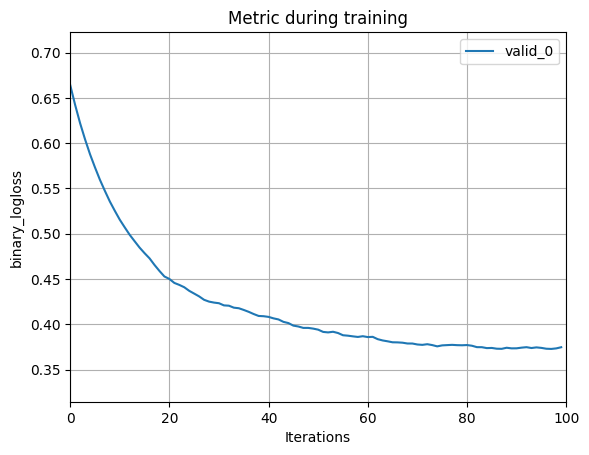

In [735]:
lgb.plot_metric(model)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

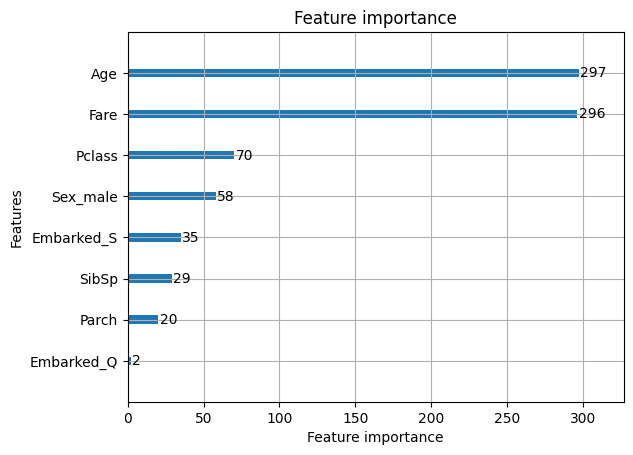

In [736]:
lgb.plot_importance(model)

In [737]:
y_pred = np.where(y_pred >= 0.5, 1, 0)

In [738]:
y_pred = np.argmax(y_pred, axis=1)

In [739]:
y_test = y_test.values

In [740]:
# 精度
a = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]:
        a += 1

acc = a / len(y_pred)
print("Accuracy: ", acc)


Accuracy:  0.8582089552238806


In [741]:
y_output = model.predict_proba(x_output)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [742]:
y_output = np.argmax(y_output, axis=1)

In [743]:
print(y_output)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [744]:
test["Survived"] = y_output
t_output = test["Survived"]
t_output.index = t_output.index + 892
t_output.index.rename('PassengerId', inplace=True)
# DataFrameをCSVに出力
t_output.to_csv("output_lightGBM.csv")